In [38]:
import numpy as np
import matplotlib.pyplot as plt
from colormath.color_objects import XYZColor, HSLColor, AdobeRGBColor, BaseRGBColor, LabColor, sRGBColor, SpectralColor
from colormath.color_conversions import convert_color

In [8]:
# Definisikan range untuk L dan b
L_range = np.linspace(20,80,200)
b_range = np.linspace(0,40,200)

In [9]:
# Definisikan perhitungan untuk ITA
def calc_ITA(L, b):
    ITA = np.arctan((L-50)/b)*(180/np.pi)
    return ITA

In [29]:
# Define CIE lab to RGB
def lab2rgb(lab):
    return convert_color(lab, sRGBColor)

In [35]:
sRGBColor.clamped_rgb_b = True
sRGBColor.clamped_rgb_g = True
sRGBColor.clamped_rgb_r = True

In [77]:
# Define function to create color meshgrid
def make_color_mesh(X,Y):
    Z = [[(SpectralColor.get_numpy_array(lab2rgb(LabColor(Y[i,j], 7, X[i,j]))))[0] for j in range(X.shape[1])] for i in range(X.shape[0])]
    return Z

In [78]:
X,Y = np.meshgrid(b_range, L_range)

Z = calc_ITA(Y,X)

C:\Users\cahya\AppData\Local\Temp\ipykernel_12700\2592576584.py:3: RuntimeWarning: divide by zero encountered in divide
  ITA = np.arctan((L-50)/b)*(180/np.pi)


In [79]:
Z_color = make_color_mesh(X,Y)

In [80]:
#print(Z_color)

Text(0, 0.5, '$L^*$')

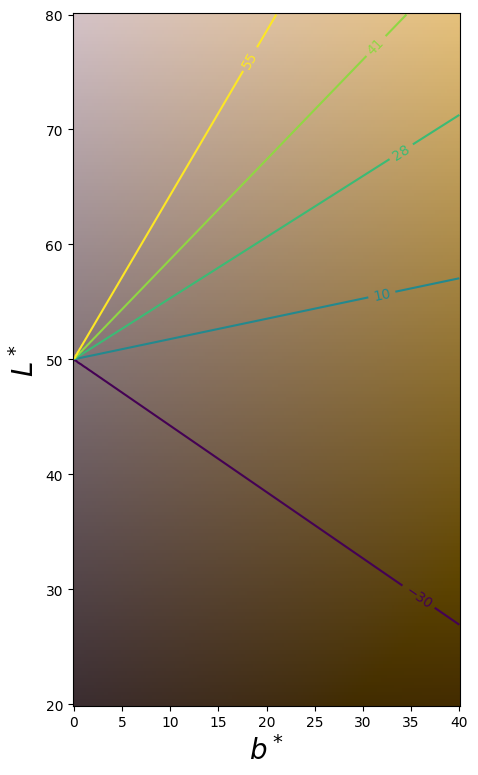

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (5,9))
#ax.pcolormesh(X,Y,Z, cmap = 'RdBu')
ax.pcolormesh(X,Y,Z_color)
cont = ax.contour(X,Y,Z, [-30,10,28,41,55])
ax.clabel(cont)
ax.set_xlabel('$b^*$', fontsize = 20)
ax.set_ylabel('$L^*$', fontsize = 20)